# Esercizi lezione laboratorio del 10 ottobre 2023

Sebbene questi esercizi siano pensati per essere svolti come programmi Python  (file `.py`) separati, per presentare assieme soluzioni e spiegazioni utilizzo qui il formato notebook.

## Esercizio 1 (P2.32)

Lo pseudo-codice seguente descrive come, in una libreria, viene calcolato l'importo di un ordine a partire dal costo totale dei libri acquistati e dal loro numero:

1. Leggere il costo totale dei libri ed il numero di libri<br>
2. Calcolare le tasse (il 7.5% del costo totale dei libri)<br>
3. Calcolare le spese di spedizione (€ 2 per ogni libro)<br>
4. L'importo totale dell'ordine è la somma del costo totale dei libri, delle tasse e delle spese di spedizione<br>
5. Visualizzare l'importo totale dell'ordine<br>

Traformare questo pseudo-codice in un programma Python.

### Soluzione

In [12]:
# costanti usate nel programma
PERCENTUALE_TASSE = 7.5
SPESE_SPEDIZIONE_PER_LIBRO = 2.0

# Leggere il costo totale dei libri ed il numero di libri
costo_totale = float(input("Immetti costo totale dei libri: "))
numero_libri = int(input("Immetti numero di libri da spedire: "))
# Calcolare le tasse (il 7.5% del costo totale dei libri)
tasse = costo_totale * PERCENTUALE_TASSE / 100
# Calcolare le spese di spedizione (€ 2 per ogni libro)
spese_spedizione = SPESE_SPEDIZIONE_PER_LIBRO * numero_libri
# L'importo totale dell'ordine è la somma del costo totale dei libri, delle tasse e delle spese di spedizione
importo_totale = costo_totale  + tasse + spese_spedizione
# Visualizzare l'importo totale dell'ordine
print("L'importo totale dell'ordine è", importo_totale)

L'importo totale dell'ordine è 13.655


## Esercizio 3 (P2.17)

Scrivere un programma che prenda due orari in formato militare (per esempio 0900 e 1730) e visualizzi il numero di ore e di minuti che li separano nel tempo, come nel seguente esempio di esecuzione (in grassetto quello che viene inserito dall'utente):

<pre>
Inserisci il primo orario: <b>0900</b>
Inserisci il secondo orario: <b>1730</b>
8 ore e 30 minuti
</pre>

Attenzione al caso in cui il primo orario sia successivo al secondo:

<pre>
Inserisci il primo orario: <b>1730</b>
Inserisci il secondo orario: <b>0900</b>
8 ore e 30 minuti
</pre>

### Soluzioni

Ad una analisi superficiale, potrebbe sembrare che per calcolare la differenza tra i due orari sia sufficiente leggere entrambi come numeri interi, e farne la differenza aritmetica. In certi casi questo funziona: ad esempio, con gli orari 0900 e 1730, se ne faccio la differenza ottengo 1730 - 900 = 830 che, interpretato secondo lo "standard militare", sono correttamente 8 ore e 30 minuti. Ma se provo con gli orari 0930 e 1000, la differenza è 1000 - 930 = 70 che non ha molto senso (la vera differenza tra i due orari è 30 minuti).

Il modo corretto per risolvere il problema è questo

1. Leggere i due orari (esempio: 0900 e 1730)
2. Estrarre dal primo orario il numero di ore e il numero di minuti, da mettere in variabili separate (esempio: 9 ore e 0 minuti)
3. Convertire il primo orario tutto in minuti (esempio: 9 * 60 + 0 = 540 minuti)
4. Ripetere i passi 2 e 3 per il secondo orario (esempio: 17 * 60 + 30 = 1050 minuti)
5. Calcolare la differenza (in minuti) tra i due orari (esempio: 510 minuti)
6. Convertire la differenza in ore e minuti, come da esercizio 9 del 2/10/2023 (esempio 510 minuti = 68 ore e 30 minuti)
7. Stampare il risultato

Nel convertire il punto 1 in un codice Python, si può scegliere di leggere l'orario in input come numero intero o come stringa. Questa scelta avrà ovviamente ripercussioni sui punti successivi.

#### Soluzione 1

Se per il punto 1 decidiamo di usare variabili intere, l'estrazione di ore e minuti avviene dividendo il numero in input per 100. Il quoziente intero della divisione è il numero di ore, il resto della divisione il numero di minuti.

Ad esempio, 1530 diviso 100 fa 15 col resto di 30.

In [5]:
# costanti
MINUTI_PER_ORA = 60

# 1. Leggere i due orari
orario1 = int(input("Immetti il primo orario: "))
orario2 = int(input("Immetti il secondo orario: "))

# 2. Estrarre dal primo orario il numero di ore e il numero di minuti, da mettere in variabili separate
ore1 = orario1 // 100    # calcola il quoziente intero di orario1 diviso 100
minuti1 = orario1 % 100  # calcola il resto della divisione di orario 1 diviso 100

# 3. Convertire il primo orario tutto in minuti
orario1_minuti = ore1 * MINUTI_PER_ORA + minuti1

# 4. Ripetere i passi 2 e 3 per il secondo orario
ore2 = orario2 // 100
minuti2 = orario2 % 100
orario2_minuti = ore2 * MINUTI_PER_ORA + minuti2

# 5. Calcolare la differenza (in minuti) tra i due orari
# Notare l'uso della funzione valore assoluto per far sì che il la differenza sia
# sempre positiva.
differenza = abs(orario1_minuti - orario2_minuti)

# 6. Convertire la differenza in ore e minuti, come da esercizio 9 del 2/10/2023
differenza_ore = differenza // MINUTI_PER_ORA
differenza_minuti = differenza % MINUTI_PER_ORA

# 7. Stampare il risultato
print(differenza_ore, "ore e", differenza_minuti, "minuti")


8 ore e 30 minuti


#### Soluzione 2

Se per il punto 1 decidiamo di usare variabili variabili di tipo stringa, l'estrazione di ore e minuti avviene tramite l'operazione di selezione di sottostringhe.

In [8]:
# costanti
MINUTI_PER_ORA = 60

# 1. Leggere i due orari
# non uso int, quindi gli orari vengono letti come stringhe
orario1 = input("Immetti il primo orario: ")
orario2 = input("Immetti il secondo orario: ")

# 2. Estrarre dal primo orario il numero di ore e il numero di minuti, da mettere in variabili separate
# estra caratteri nelle posizioni 0 ed 1 (prima e seconda) e li converte in intero
ore1 = int(orario1[:2])
# estra caratteri nelle posizioni 2 e 3 (seconda e terza) e li converte in intero
minuti1 = int(orario1[2:])

# 3. Convertire il primo orario tutto in minuti
orario1_minuti = ore1 * MINUTI_PER_ORA + minuti1

# 4. Ripetere i passi 2 e 3 per il secondo orario
ore2 = int(orario2[:2])
minuti2 = int(orario2[2:])
orario2_minuti = ore2 * MINUTI_PER_ORA + minuti2

# 5. Calcolare la differenza (in minuti) tra i due orari
# Notare l'uso della funzione valore assoluto per far sì che il la differenza sia
# sempre positiva.
differenza = abs(orario1_minuti - orario2_minuti)

# 6. Convertire la differenza in ore e minuti, come da esercizio 9 del 2/10/2023
differenza_ore = differenza // MINUTI_PER_ORA
differenza_minuti = differenza % MINUTI_PER_ORA

# 7. Stampare il risultato
print(differenza_ore, "ore e", differenza_minuti, "minuti")


0 ore e 30 minuti


## Esercizio 4 (P2.26)

Scrivere un programma che visualizzi questo bersaglio formato da cerchi concentrici:

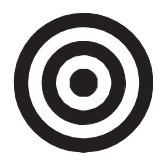

*Suggerimento*: iniziare dal cerchio esterno

### Soluzione 1

La mia idea originale, che giustifica anche il suggerimento di iniziare dal cerchio esterno, era quella di disegnare una alternanza di cerchi neri e bianchi, tutti pieni, da quello esterno a quello più interno. Ogni nuovo cerchio ricopre parzialmente quello precedente, generando il risultato desiderato. Per calcolare le coordinate da utilizzare nel comando `drawOval`, può essere conveniente disegnare prima il tutto a mano.

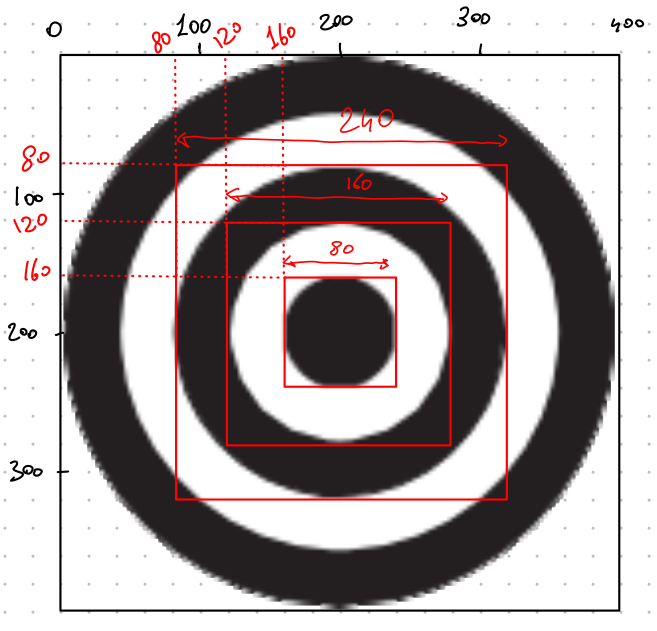

In [15]:
from ezgraphics import GraphicsWindow
win = GraphicsWindow()
canvas = win.canvas()

canvas.setFill("black")
canvas.drawOval(0, 0, 400, 400)
canvas.setFill("white")
canvas.drawOval(40, 40, 320, 320)
canvas.setFill("black")
canvas.drawOval(80, 80, 240, 240)
canvas.setFill("white")
canvas.drawOval(120, 120, 160, 160)
canvas.setFill("black")
canvas.drawOval(160, 160, 80, 80)
win.wait()

### Soluzione 2

Tuttavia, molti di voi l'hanno risolto disegnando invece delle circonferenze nere concentriche vuote, ma aumentando lo spessore delle linee. Anche questa soluzione va bene, anzi, a conti fatti, è più semplice della prima.

In [24]:
from ezgraphics import GraphicsWindow
win = GraphicsWindow()
canvas = win.canvas()

canvas.setLineWidth(40)
canvas.drawOval(20,20,359,359)
canvas.drawOval(100,100,200,200)
canvas.setFill("black")
canvas.drawOval(180, 180, 40, 40)
win.wait()

## Esercizio 5 (P2.19)

Scrivere un programma che prende in input un numero da 1 a 12, e stampa il nome del mese corrispondente.

*Suggerimento*: Create un stringa molto lunga che contenga tutti i nomi dei mesi, nella quale inserire degli spazi in modo che ogni nome abbia la stessa lunghezza. Quindi utilizzate il numero inserito dall'utente per calcolare quale sottostringa estrarre.

### Soluzione

Il mese che ha il nome più lungo è settembre (sono 9 caratteri). La stringa di cui parla il suggerimento, in cui ogni mese occupa sempre 9 posizioni, è quindi la seguente:
```python
NOMI_MESI = "Gennaio  Febbraio Marzo    Aprile   Maggio   Giugno   Luglio   Agosto   SettembreOttobre  Novembre Dicembre "
```
Ora supponiamo di dover estrarre il nome del mese numero 3. Siccome ogni mese occupa 9 caratteri, e dobbiamo saltare i primi 2 che non sono quelli giusti, la parola `Marzo` inizierà alla posizione (3-1) * 9 = 18, e terminerà alla posizione 18 + 9 = 27, con la posizione 27 esclusa perché contiene già il primo carattere di `Aprile`. In generale, se $i$ è il numero del mese inserito dall'utente, la posizione iniziale da cui estrarre il nome del mese è $9(i-1)$.

In [20]:
NOMI_MESI = "Gennaio  Febbraio Marzo    Aprile   Maggio   Giugno   Luglio   Agosto   SettembreOttobre  Novembre Dicembre "
mese = int(input("Immettere numero mese: "))
pos_iniziale = (mese - 1)*9
pos_finale = pos_iniziale + 9
print("Il mese scelto è", NOMI_MESI[pos_iniziale:pos_finale])

Il mese scelto è Dicembre 


## Esercizio 6 (P2.31)

Disegnare un grafico a barre (orizzontali o verticali, a vostra scelta) per rappresentare i dati seguenti, scrivendo una etichetta accanto a ciascuna barra. Consultare la [documentazione di ezgraphics](http://www.ezgraphics.org/UserGuide/UserGuide) per scoprire come disegnare rettangoli e come scrivere sul canvas.

|Nome del ponte   |Campata più lunga in piedi|
|-----------------|--------------------------|
|Golden gate      |4200                      |
|Brooklin         |1595                      |
|Delaware memorial|2150                      |
|Mackinac 	      |3800                      |

### Soluzione

A parte il fatto che per disegnare dei rettangoli si usa il metodo `drawRect` dell'oggetto `canvas` mentre per disegnare del testo si usa il metodo `drawText`, la cosa importante da capire è che le lunghezze delle barre non posso essere esattamente uguali alle lunghezze dei ponti, perché si tratta di valori troppo grandi. La finestra grafica di default è 400 * 400 pixel, e anche se è possibile cambiarne le dimensioni, 4200 punti (la lunghezza del Golde gate) sarebbero troppi per la maggior parte degli schermi. Serve quindi decidere un valore di scala per il quale dividere tutte le lunghezze (20 nel programma qui sotto).

A questo punto, è possibile disegnare barre e testo andando un po' ad occhio, ma nella soluzione qui sotto ho cercato di essere un po' sistematico, e calcolare tutte le coordinate a partire da un certo numero di costanti fissate a priori, secondo il seguente schema:

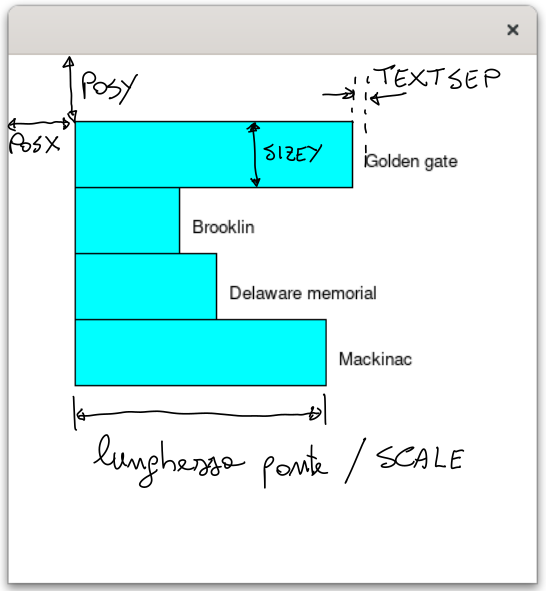

In [16]:
from ezgraphics import GraphicsWindow
win = GraphicsWindow()
canvas = win.canvas()

TEXTSEP = 10 # spazio orizzontale tra la barra e la scritta corrisondente
POSX = 50 # spazio orizzontale tra il bordo sinistro della finestra e le barre
POSY = 50 # spazio verticale tra il bordo superiore della finestra e la prima barra
SIZEY = 50 # larghezza delle barre
SCALE = 20 # fattore per cui dividere la lunghezza delle campate per determinarne la dimensione in pixel

canvas.setFill("cyan")
canvas.drawRect(POSX, POSY, 4200 // SCALE, SIZEY)
canvas.drawText(POSX + 4200 // SCALE + TEXTSEP, POSY + SIZEY // 2,  "Golden gate")

canvas.drawRect(POSX, POSY + SIZEY, 1595 // SCALE, SIZEY)
canvas.drawText(POSX + 1595 // SCALE + TEXTSEP, POSY + SIZEY + SIZEY // 2,  "Brooklin")

canvas.drawRect(POSX, POSY + 2*SIZEY, 2150 // SCALE, SIZEY)
canvas.drawText(POSX + 2150 // SCALE + TEXTSEP, POSY + 2*SIZEY + SIZEY // 2,  "Delaware memorial")

canvas.drawRect(POSX, POSY + 3*SIZEY, 3800 // SCALE, SIZEY)
canvas.drawText(POSX + 3800 // SCALE + TEXTSEP, POSY + 3*SIZEY + SIZEY // 2,  "Mackinac")

win.wait()

## Esercizio 7 (P2.5)

Scrivere un programma che chiede all'utente due numeri interi e visualizza:

* la somma
* la differenza
* il prodotto
* il valore medio
* la distanza (cioè il valore assoluto della differenze)
* il valore massimo
* il valore minimo

Far sì che l'outpit si allinato come segue (contattare il docente quando arrivate a questo esercizio!):

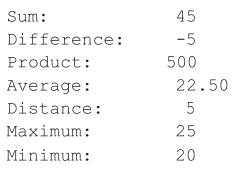

### Soluzioni

Il calcolo dei valori è banale. Quello che è interessante è come ottenere la formattazione desiderata. Rimandiamo la soluzione ad una delle prossime lezioni, nella quale introdurremo uno strumento specifico per questo scopo: le f-stringhe.